In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import tifffile as tif
import pandas as pd

In [2]:
fx = itk.imread('/home/dennislab2/Desktop/brains/2024-02-01_141816_fused_12_reslice.tif',pixel_type=itk.US)
mv = itk.imread('/home/dennislab2/Desktop/brains/allenCCF_25.tif')


TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.


In [4]:
reshape_vals=[]
for i in np.arange(0,3):
    mvshape = np.shape(mv)
    fxshape = np.shape(fx)
    reshape_vals.append((1.4*(fxshape[i]/mvshape[i])))
reshape_vals

[1.719298245614035, 1.535625, 1.8003787878787876]

In [3]:
mv_140 = zoom(mv,reshape_vals,mode='nearest')
np.shape(mv_140)

NameError: name 'reshape_vals' is not defined

In [3]:
#tif.imsave('/home/dennislab2/Desktop/allen_140.tif',mv_140)
mv_140= itk.imread('/home/dennislab2/Desktop/allen_140.tif')

In [5]:
parameter_object = itk.ParameterObject.New()
parameter_object.AddParameterFile('/home/dennislab2/Desktop/GitHub/cleared_brains/parameter_folder/Order1_Par0000affine.txt')
parameter_object.AddParameterFile('/home/dennislab2/Desktop/GitHub/cleared_brains/parameter_folder/Order3_Par0000bspline.txt')
parameter_object.AddParameterFile('/home/dennislab2/Desktop/GitHub/cleared_brains/parameter_folder/Order4_Par0000bspline.txt')
parameter_object.AddParameterFile('/home/dennislab2/Desktop/GitHub/cleared_brains/parameter_folder/Order5_Par0000bspline.txt')

In [7]:
result_img_elx, result_transform_params = itk.elastix_registration_method(fx,mv_140,parameter_object,log_to_file=True,output_directory='/home/dennislab2/Desktop/allen_to_2024-05/')

In [9]:
tif.imsave('/home/dennislab2/Desktop/allen_to_2024-02-01/allen_in_2024-02-01.tif',result_img_elx)

In [4]:
itk.Tr

# transformix

In [11]:
itk.transformix_pointset

<function itk.ElastixPython.transformix_pointset(*args, **kwargs)>

In [12]:
pts = [100,100,100]

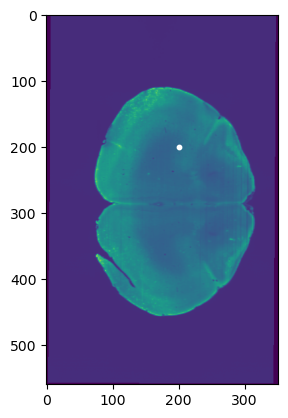

In [58]:
aval=100
bval=200
val=bval
plt.imshow(fx[:,:,val])#,clim=(0,300))
plt.scatter(val,val,s=10,c='w')

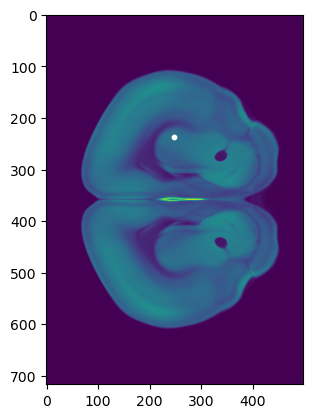

In [55]:
c=b
plt.imshow(mv_140[:,:,c[2]])
plt.scatter(c[0],c[1],s=10,c='w')

In [47]:
print(np.shape(fx))
print(np.shape(mv_140))

(560, 351, 679)
(717, 498, 897)


In [50]:
a=[136,105,136]
b=[247,237,272]

In [ ]:
#result_transform_params=
resultimg, result_transform_parameters = itk.elastix_registration_method(fx,mv_140,initial_transform_parameter_file_name='/home/dennislab2/Desktop/2024-02-01_141816/TransformParameters.3.txt')

In [ ]:
result_transform_parameters

In [6]:
itk.transformix_pointset(mv_140,initial_transform_parameter_file_name='/home/dennislab2/Desktop/2024-02-01_141816/TransformParameters.3.txt',fixed_point_set_file_name='/home/dennislab2/Desktop/testptset.txt',output_directory="/home/dennislab2/Desktop")

AttributeError: 'itkTransformixFilterIUS3' object has no attribute 'SetInitialTransformParameterFileName'

In [7]:
parameterMap0 = itk.ParameterObject#("/home/dennislab2/Desktop/2024-02-01_141816/allen_to_2024-02-01/TransformParameters.0.txt")

In [24]:
tst=itk.ParameterObject.New()
tst.AddParameterFile("/home/dennislab2/Desktop/2024-02-01_141816/allen_to_2024-02-01/TransformParameters.0.txt")
tst.AddParameterFile

In [4]:
i=0
print(i)

0


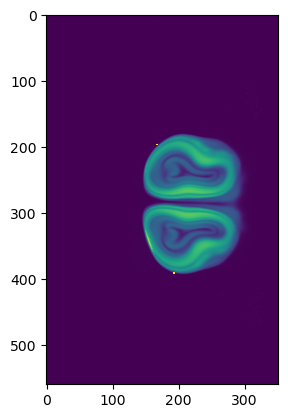

In [63]:
parameterMap1 = sitk.ReadParameterFile("/path/to/TransformParameters.1.txt`)
transformixImageFilter.SetParameterMap(parameterMap0)
transformixImageFilter.AddParameterMap(parameterMap1)

In [ ]:
# for each file, get all the points
# adjust them by the adjusted file info 
# downsample: 
    # reset xyz to be x=max cmy-cmy, y=cmz, z=cmx
    #I think divide by 884
#final vol is 678x 350y 560z


In [152]:
offsets = pd.read_csv('/home/dennislab2/Desktop/2024-02-01_141816/2024-02-01_offsets.csv',header=None)
offsets.columns=['view','x','y','z']
offsets.x=offsets.x*-1
offsets.y=offsets.y*-1
offsets.z=offsets.z*-1
offsets
# this makes 0,0 to 2048,2048 for all points WITHIN THEIR VOLS

,view,x,y,z
0,0,-1303.285304,4152.512885,2056.183950
1,1,242.179259,4133.229548,2048.359441
2,2,1785.181886,4117.636255,2046.239225
3,3,3326.343198,4092.006744,2058.219036
4,4,-1305.175593,2644.778095,2062.647370
5,5,244.209291,2626.043520,2060.806305
6,6,1787.779314,2609.559367,2063.768499
7,7,3332.813061,2590.671257,2075.030627
8,8,-1304.893456,1133.489608,2070.502650
9,9,243.755624,1115.842248,2073.316999


In [154]:
# full volume space is 8192
offsets.x+=[6144,4096,2048,0]*5

In [158]:
offsets.y+=[0,0,0,0,2048,2048,2048,2048,4096,4096,4096,4096,6144,6144,6144,6144,8192,8192,8192,8192]

In [126]:
offsets # now in full  space

,view,x,y,z
0,0,5249.141941,4271.209919,1935.956529
1,1,4485.120000,4259.840000,1921.367521
2,2,3717.150998,4257.901803,1928.248999
3,3,2949.901756,4256.516111,1937.365830
4,4,5267.727521,5005.713273,2062.656493
5,5,4498.887458,4983.234745,2041.754994
6,6,3729.999157,4947.493244,2020.810784
7,7,2950.917646,4918.398492,2000.357848
8,8,5280.598596,5572.159544,2069.158423
9,9,4522.940806,5569.245183,2065.035449


In [159]:
cmzadj=356/1999
cmxadj=560/(2048*4)
cmyadj=679/(2048*5)

In [ ]:
# divide by cmyoldadj

In [160]:
listofss=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19']
[i for i in np.arange(len(listofss))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [162]:
for i in np.arange(0,len(listofss)):
    data = pd.read_csv('/home/dennislab2/Desktop/2024-02-01_141816/s{}_test.csv'.format(listofss[i]),header=None)
    data.columns=['cmx','cmy','cmz']
    offset_subdf=offsets[offsets.index==i]
    data.cmx+=float(offsets[offsets.view==i].x)
    data.cmx=data.cmx*cmxadj
    data.cmy+=float(offsets[offsets.view==i].y)
    data.cmy=data.cmy*cmyadj
    data.cmz+=float(offsets[offsets.view==i].z)
    data.cmz=data.cmz*cmzadj
    data.to_csv('/home/dennislab2/Desktop/2024-02-01_141816/s{}_adj_indownsampled.csv'.format(listofss[i]),header=None,index=None)
    print('done with {}, num {}'.format(listofss[i],i))

done with 00, num 0
done with 01, num 1
done with 02, num 2
done with 03, num 3
done with 04, num 4
done with 05, num 5
done with 06, num 6
done with 07, num 7
done with 08, num 8
done with 09, num 9
done with 10, num 10
done with 11, num 11
done with 12, num 12
done with 13, num 13
done with 14, num 14
done with 15, num 15
done with 16, num 16
done with 17, num 17
done with 18, num 18
done with 19, num 19


In [163]:
cmyoldadj=(2048*3)/647
cmynew = 647/(2048*5)

In [165]:
for i in np.arange(0,len(listofss)):
    data = pd.read_csv('/home/dennislab2/Desktop/2024-05-13_134/s{}_adj_indownsampled.csv'.format(listofss[i]),header=None)
    data.columns=['cmx','cmy','cmz']
    data.cmy=data.cmy*cmyoldadj
    data.cmy = data.cmy*cmynew
    data.to_csv('/home/dennislab2/Desktop/2024-05-13_134/s{}_adj_indownsampled_AGAIN.csv'.format(listofss[i]),header=None,index=None)
    print('done with {}, num {}'.format(listofss[i],i))

done with 00, num 0
done with 01, num 1
done with 02, num 2
done with 03, num 3
done with 04, num 4
done with 05, num 5
done with 06, num 6
done with 07, num 7
done with 08, num 8
done with 09, num 9
done with 10, num 10
done with 11, num 11


FileNotFoundError: [Errno 2] No such file or directory: '/home/dennislab2/Desktop/2024-05-13_134/s12_adj_indownsampled.csv'

In [80]:
data = pd.read_csv('/home/dennislab2/Desktop/2024-05-13_134/s00_adj.csv',header=None)
data.columns=['x','y','z']
data['xoff']=0
data['yoff']=0
data['zoff']=0
data.head()

,x,y,z,xoff,yoff,zoff
0,1162.858059,-4222.209919,-1929.118922,0,0,0
1,922.858059,-4111.209919,-1918.862512,0,0,0
2,1108.858059,-4183.209919,-1922.281315,0,0,0
3,1119.858059,-4195.209919,-1918.862512,0,0,0
4,1138.858059,-4179.209919,-1918.862512,0,0,0


In [ ]:
# add offset for row, col

In [ ]:
# now we have points in 12-20 files that have cm2 points in downsampled tiff space
# next we need to swap axes in a smart way
# then transformix points
# then divide by 1.4
# then get floats!
# later go back and do cm2 on 12-19 for 2024-05 brain

In [ ]:
# to format for transformix, need things to go from x,y,z to 
# header = point
# number of points
# all the points, each set of 3 on a line, sep by space not comma

In [185]:
total_len=0
df=pd.DataFrame([['point','',''],[str(total_len),'','']],columns=['tx','ty','tz'])
for val in listofss:
    # get the df
    data = pd.read_csv('/home/dennislab2/Desktop/2024-02-01_141816/s{}_adj_indownsampled.csv'.format(val),header=None)
    data.columns=['tx','ty','tz']
    df = pd.concat([df,data]).reset_index(drop=True)
    total_len+=len(data)
    print(total_len,'on file',val)
df.tx[1]=str(total_len)

656903 on file 00
2108028 on file 01
3412198 on file 02
3950273 on file 03
4288555 on file 04
5082822 on file 05
5854067 on file 06
6280405 on file 07
6904694 on file 08
7590530 on file 09
8239787 on file 10
8733352 on file 11
9128020 on file 12
9754710 on file 13
10319051 on file 14
10660543 on file 15
10676666 on file 16
11402657 on file 17
12178121 on file 18
12203967 on file 19


In [186]:
df.to_csv('/home/dennislab2/Desktop/2024-02-01_points.txt',sep=' ',header=None,index=None)

In [182]:
listofss[0:12]

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']

In [170]:
dft = pd.DataFrame([[1,1,1],[2,2,2],[3,3,3]])
dft

,0,1,2
0,1,1,1
1,2,2,2
2,3,3,3


In [180]:
dft.columns=['tx','ty','tz']
dfnew=pd.concat([df,dft]).reset_index(drop=True)
dfnew.tx[1]=str(total_len)

'0'

In [168]:
df.to_csv('/home/dennislab2/Desktop/test.csv',sep=' ')

In [4]:
itk.

In [ ]:
itk.Tr

In [ ]:
test=itk.

In [26]:
itk.transformread('/home/dennislab2/Desktop/2024-02-01_141816/allen_to_2024-02-01/TransformParameters.3.txt')

RuntimeError: /work/ITK-source/ITK/Modules/IO/TransformInsightLegacy/src/itkTxtTransformIO.cxx:160:
ITK ERROR: TxtTransformIOTemplate(0x55629c03dcd0): Tags must be delimited by :

In [ ]:
result_transform_params = 

In [ ]:
itk.transformix_pointset(mv_140,result_transform_params,fixed_point_set_file_name='/home/dennislab2/Desktop/2024-02-01_points.txt',output_directory="/home/dennislab2/Desktop/2024-02-01_141816")

In [ ]:
itk.transformix_pointset(mv_140,result_transform_params,fixed_point_set_file_name='/home/dennislab2/Desktop/2024-05-13_134_points.txt',output_directory="/home/dennislab2/Desktop/2024-05-13_134")